In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('Original_dataset.csv')
df.head()

,Title,Sub_title,Price,Brand,Condition,Edition,Model,Features,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Apple iPhone 11 128GB (Used) for sale,"Posted on 09 Oct 1:05 pm, Moratuwa, Colombo","Rs 137,990",Apple,Used,128GB,iPhone 11,NaN,"Moratuwa, Colombo",à¶à¶¶à¶§ à·à·à¶¯ à¶­à¶­à·à·à¶ºà· à¶ à¶½à...,https://ikman.lk/en/ad/apple-iphone-11-128gb-u...,T.Phone Zone,Premium-Member,09/10/2021 13:05
1,Infinix Hot 10 Play (New) for sale,"Posted on 23 Oct 8:34 pm, Alutgama, Kalutara","Rs 28,500",Infinix,New,Hot 10 Play,Other model,"Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...","Alutgama, Kalutara",INFINIX HOT 10 PLAY4 GB RAM / 64GB ROM ââ...,https://ikman.lk/en/ad/infinix-hot-10-play-new...,EMAX Sri Lanka,Member,23/10/2021 20:34
2,Apple iPhone 7 USA < USA> (Used) for sale,"Posted on 24 Oct 10:24 am, Angoda, Colombo","Rs 35,000",Apple,Used,USA < USA>,iPhone 7,NaN,"Angoda, Colombo",ððIMPORTED NOT USED IN SRI LANKAðð...,https://ikman.lk/en/ad/apple-iphone-7-usa-usa-...,Smart Hub,Premium-Member,24/10/2021 10:24
3,Huawei Y3 (Used) for sale,"Posted on 24 Oct 10:23 am, Negombo, Gampaha","Rs 7,000",Huawei,Used,NaN,Y3,"Bluetooth, Camera, Dual SIM, Expandable Memory...","Negombo, Gampaha",glass crack price can change call for more det...,https://ikman.lk/en/ad/huawei-y3-used-for-sale...,philip roshan,Member,24/10/2021 10:23
4,Xiaomi Redmi 9 (Used) for sale,"Posted on 24 Oct 10:22 am, Kottawa, Colombo","Rs 19,000",Xiaomi,Used,Xiaomi,Redmi 9,"Bluetooth, Camera, Dual-Lens Camera, Dual SIM,...","Kottawa, Colombo",full set 4th cam glass crack all cams working ...,https://ikman.lk/en/ad/xiaomi-redmi-9-good-use...,maxa king,Member,24/10/2021 10:22


In [3]:
df2 = df.drop(df.columns[[0,1,7,8,9,10,11,12]], axis=1)
df2.head()

,Price,Brand,Condition,Edition,Model,published_date
0,"Rs 137,990",Apple,Used,128GB,iPhone 11,09/10/2021 13:05
1,"Rs 28,500",Infinix,New,Hot 10 Play,Other model,23/10/2021 20:34
2,"Rs 35,000",Apple,Used,USA < USA>,iPhone 7,24/10/2021 10:24
3,"Rs 7,000",Huawei,Used,NaN,Y3,24/10/2021 10:23
4,"Rs 19,000",Xiaomi,Used,Xiaomi,Redmi 9,24/10/2021 10:22


In [4]:
df2.shape

(51223, 6)

In [5]:
df_filtered = df2[df2['Condition'] == 'Used']
df_filtered.head()

,Price,Brand,Condition,Edition,Model,published_date
0,"Rs 137,990",Apple,Used,128GB,iPhone 11,09/10/2021 13:05
2,"Rs 35,000",Apple,Used,USA < USA>,iPhone 7,24/10/2021 10:24
3,"Rs 7,000",Huawei,Used,NaN,Y3,24/10/2021 10:23
4,"Rs 19,000",Xiaomi,Used,Xiaomi,Redmi 9,24/10/2021 10:22
5,"Rs 41,500",Xiaomi,Used,NaN,Redmi Note 9 Pro,24/10/2021 10:22


In [6]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41960 entries, 0 to 51222
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           41960 non-null  object
 1   Brand           41960 non-null  object
 2   Condition       41960 non-null  object
 3   Edition         35200 non-null  object
 4   Model           41960 non-null  object
 5   published_date  41960 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB


In [7]:
df_filtered['Price'] = df_filtered.Price.replace('\D', '', regex=True).astype(int)

In [8]:
df_filtered.head()

,Price,Brand,Condition,Edition,Model,published_date
0,137990,Apple,Used,128GB,iPhone 11,09/10/2021 13:05
2,35000,Apple,Used,USA < USA>,iPhone 7,24/10/2021 10:24
3,7000,Huawei,Used,NaN,Y3,24/10/2021 10:23
4,19000,Xiaomi,Used,Xiaomi,Redmi 9,24/10/2021 10:22
5,41500,Xiaomi,Used,NaN,Redmi Note 9 Pro,24/10/2021 10:22


In [9]:
df_filtered['published_month'] = df_filtered['published_date'].str.slice(3,5)

In [10]:
df_filtered.head()

,Price,Brand,Condition,Edition,Model,published_date,published_month
0,137990,Apple,Used,128GB,iPhone 11,09/10/2021 13:05,10
2,35000,Apple,Used,USA < USA>,iPhone 7,24/10/2021 10:24,10
3,7000,Huawei,Used,NaN,Y3,24/10/2021 10:23,10
4,19000,Xiaomi,Used,Xiaomi,Redmi 9,24/10/2021 10:22,10
5,41500,Xiaomi,Used,NaN,Redmi Note 9 Pro,24/10/2021 10:22,10


In [11]:
file_name = 'filtered_dataset_forinflation.csv'
  
# saving the excel
df_filtered.to_csv(file_name)
print('DataFrame is written to CSV File successfully.')

DataFrame is written to CSV File successfully.


In [12]:
df_filtered.published_month.unique()

array(['10', '09', '11', '12'], dtype=object)

In [13]:
df_filtered.published_month.value_counts()

11    23608
12     9965
10     8384
09        3
Name: published_month, dtype: int64

In [14]:
df_filterednew = df_filtered[df_filtered['published_month'] != '09']
df_filterednew.head()

,Price,Brand,Condition,Edition,Model,published_date,published_month
0,137990,Apple,Used,128GB,iPhone 11,09/10/2021 13:05,10
2,35000,Apple,Used,USA < USA>,iPhone 7,24/10/2021 10:24,10
3,7000,Huawei,Used,NaN,Y3,24/10/2021 10:23,10
4,19000,Xiaomi,Used,Xiaomi,Redmi 9,24/10/2021 10:22,10
5,41500,Xiaomi,Used,NaN,Redmi Note 9 Pro,24/10/2021 10:22,10


In [15]:
df_filterednew.published_month.value_counts()

11    23608
12     9965
10     8384
Name: published_month, dtype: int64

Text(0.5, 1.0, 'Price Distribution')

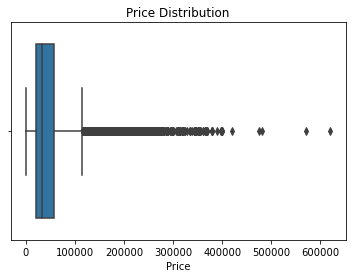

In [16]:
sns.boxplot(df_filterednew['Price'])
plt.title('Price Distribution')

In [17]:
df_filterednew = df_filterednew[df_filterednew['Price'] < 400000]
df_filterednew.head()

,Price,Brand,Condition,Edition,Model,published_date,published_month
0,137990,Apple,Used,128GB,iPhone 11,09/10/2021 13:05,10
2,35000,Apple,Used,USA < USA>,iPhone 7,24/10/2021 10:24,10
3,7000,Huawei,Used,NaN,Y3,24/10/2021 10:23,10
4,19000,Xiaomi,Used,Xiaomi,Redmi 9,24/10/2021 10:22,10
5,41500,Xiaomi,Used,NaN,Redmi Note 9 Pro,24/10/2021 10:22,10


Text(0.5, 1.0, 'Price Distribution')

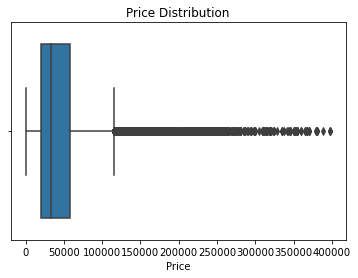

In [18]:
sns.boxplot(df_filterednew['Price'])
plt.title('Price Distribution')

        Price        Brand Condition            Edition              Model  \
0      137990        Apple      Used              128GB          iPhone 11   
2       35000        Apple      Used         USA < USA>           iPhone 7   
3        7000       Huawei      Used                NaN                 Y3   
4       19000       Xiaomi      Used             Xiaomi            Redmi 9   
5       41500       Xiaomi      Used                NaN   Redmi Note 9 Pro   
...       ...          ...       ...                ...                ...   
51214  190000        Apple      Used                NaN  iPhone 11 Pro Max   
51215   59999       Huawei      Used               2020        Mate 10 Pro   
51216   67000        Apple      Used              256GB      iPhone 7 Plus   
51220   37999       Google      Used                  3              Pixel   
51222   25500  Other brand      Used  Techno Spark 6 Go        Other model   

         published_date published_month  
0      09/10/2021 13:

Text(0.5, 0, 'Published Month')

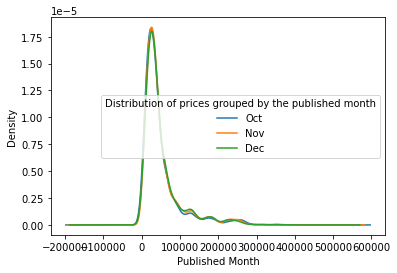

In [19]:
df_filterednew.groupby('published_month')['Price'].plot(kind='kde')
print(df_filtered)
# Add legend to plot
plt.legend(['Oct', 'Nov', 'Dec'], title='Distribution of prices grouped by the published month')

# Add x-axis label
plt.xlabel('Published Month') 

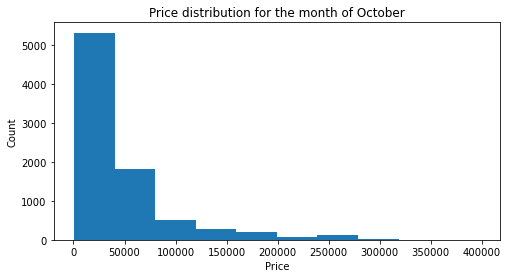

In [20]:
# filter data for a specific month
month = '10'
October_df = df_filterednew[df_filterednew['published_month']==month]

# plot price distribution
plt.figure(figsize=(8,4))
plt.hist(October_df['Price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title(f'Price distribution for the month of October')
plt.show()

In [21]:
October_df.Price.mean()

48305.600023857805

In [22]:
October_apple_df = October_df[October_df['Brand'] == 'Apple']
October_apple_df.head()

,Price,Brand,Condition,Edition,Model,published_date,published_month
0,137990,Apple,Used,128GB,iPhone 11,09/10/2021 13:05,10
2,35000,Apple,Used,USA < USA>,iPhone 7,24/10/2021 10:24,10
7,44000,Apple,Used,Red,iPhone 7,24/10/2021 10:21,10
10,107000,Apple,Used,IPhone XS gold 256GB,iPhone XS,24/10/2021 10:20,10
15,80000,Apple,Used,64GB,iPhone X,24/10/2021 10:19,10


In [23]:
October_apple_df.Price.mean()

73394.67865044248

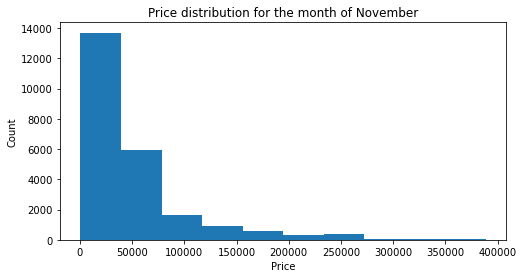

In [24]:
# filter data for a specific month
month = '11'
November_df = df_filterednew[df_filterednew['published_month']==month]

# plot price distribution
plt.figure(figsize=(8,4))
plt.hist(November_df['Price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title(f'Price distribution for the month of November')
plt.show()

In [25]:
November_df.Price.mean()

51299.12980300784

In [26]:
November_apple_df = November_df[November_df['Brand'] == 'Apple']
November_apple_df.head()

,Price,Brand,Condition,Edition,Model,published_date,published_month
10227,368000,Apple,Used,iPhone 13 Pro Max,iPhone 13 Pro Max,01/11/2021 06:42,11
10228,38900,Apple,Used,(Used),iPhone 7,03/11/2021 18:02,11
10229,147000,Apple,Used,Red 128GB,iPhone 11,09/11/2021 00:48,11
10235,31000,Apple,Used,I Phone 6S / 64 GB,iPhone 6S,09/11/2021 00:45,11
10243,145000,Apple,Used,128GB,iPhone 11,09/11/2021 00:39,11


In [27]:
November_apple_df.Price.mean()

76480.44189355848

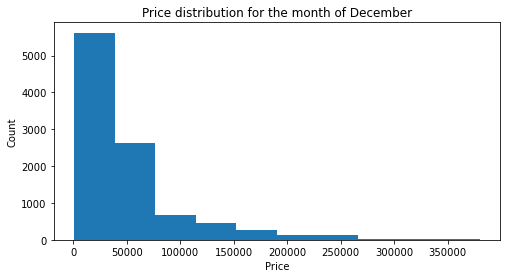

In [28]:
# filter data for a specific month
month = '12'
December_df = df_filterednew[df_filterednew['published_month']==month]

# plot price distribution
plt.figure(figsize=(8,4))
plt.hist(December_df['Price'], bins=10)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title(f'Price distribution for the month of December')
plt.show()

In [29]:
December_df.Price.mean()

51008.68818391728

In [30]:
December_apple_df = December_df[December_df['Brand'] == 'Apple']
December_apple_df.head()

,Price,Brand,Condition,Edition,Model,published_date,published_month
34735,177000,Apple,Used,(Used),iPhone 11 Pro,02/12/2021 01:36,12
34736,36999,Apple,Used,iPhone 7,iPhone 7,02/12/2021 01:36,12
34737,36999,Apple,Used,128GB,iPhone 7,02/12/2021 01:36,12
34738,36999,Apple,Used,128GB,iPhone 7,02/12/2021 01:35,12
34741,98000,Apple,Used,64 GB GOLD,iPhone XS,02/12/2021 01:34,12


In [31]:
December_apple_df.Price.mean()

74696.64411190631

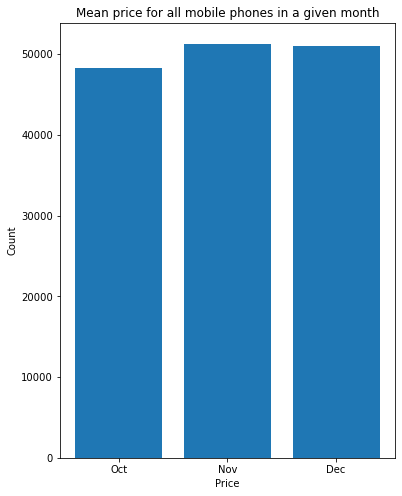

In [47]:
# creating a sample dataset using the three values of mean prices for all mobile phones
data = {'month': ['Oct', 'Nov', 'Dec'], 
        'mean_price': [48305.600023857805, 51299.12980300784, 51008.68818391728],
       'ccpi':[7.6, 9.9, 12.1]}
df = pd.DataFrame(data)
# plot mean price distribution
plt.figure(figsize=(6,8))
plt.bar(data['month'],data['mean_price'])
plt.bar(data['month'],data['ccpi'])
plt.xlabel('Price')
plt.ylabel('Count')
plt.title(f'Mean price for all mobile phones in a given month')
plt.show()

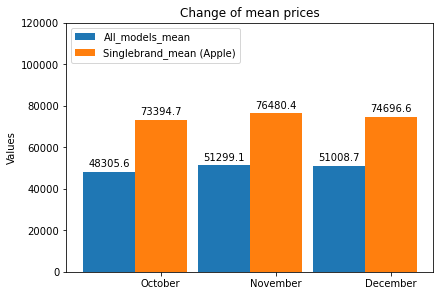

In [79]:
months = ("October", "November", "December")
calculated_means = {
    'All_models_mean': (48305.600023857805, 51299.12980300784, 51008.68818391728),
    'Singlebrand_mean (Apple)': (73394.67865044248, 76480.44189355848, 74696.64411190631),
}

x = np.arange(len(months))  # the label locations
width = 0.45  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in calculated_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Change of mean prices')
ax.set_xticks(x + width, months)
ax.legend(loc='upper left')
ax.set_ylim(0, 120000)
plt.show()